In [1]:
%matplotlib inline

import cv2
import numpy as np
import matplotlib.pyplot as plt

def read_image(path: str):
    _img = cv2.imread(path)
    _img = cv2.cvtColor(_img, cv2.COLOR_BGR2RGB)
    return _img

In [2]:
doggy_backpack = read_image('../../resources/DATA/dog_backpack.jpg')
doggy_backpack.shape

(1401, 934, 3)

In [3]:
watermark = read_image('../../resources/DATA/watermark_no_copy.png')
watermark.shape

(1280, 1277, 3)

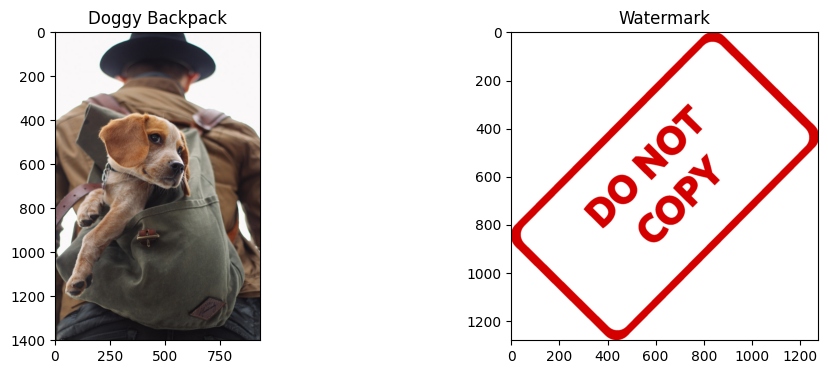

In [4]:
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.imshow(doggy_backpack)
plt.title("Doggy Backpack")

plt.subplot(1, 2, 2)
plt.imshow(watermark)
plt.title("Watermark")

plt.show()

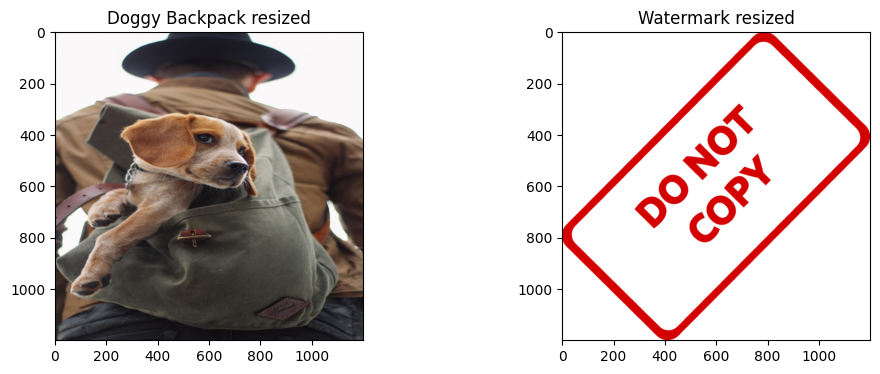

In [5]:
doggy_resized = cv2.resize(doggy_backpack, (1200, 1200))
watermark_resized = cv2.resize(watermark, (1200, 1200))

plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.imshow(doggy_resized)
plt.title("Doggy Backpack resized")

plt.subplot(1, 2, 2)
plt.imshow(watermark_resized)
plt.title("Watermark resized")

plt.show()

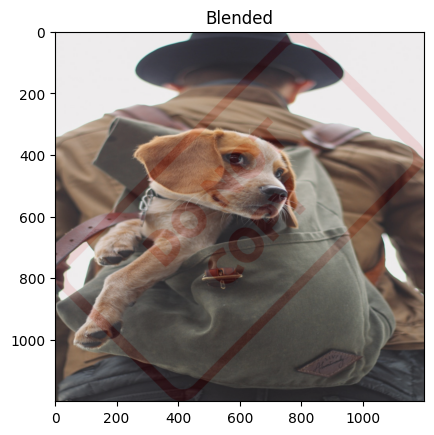

In [6]:
blended = cv2.addWeighted(src1=doggy_resized, alpha=0.85, src2=watermark_resized, beta=0.1, gamma=0)
plt.title("Blended")
plt.imshow(blended)
plt.show()

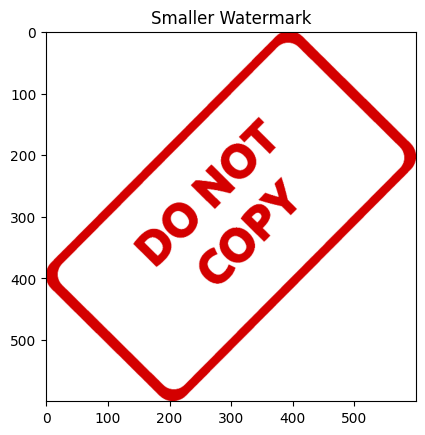

In [7]:
watermark_small = cv2.resize(watermark, (600, 600))

plt.title("Smaller Watermark")
plt.imshow(watermark_small)
plt.show()

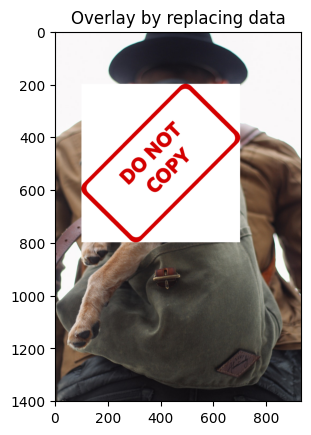

In [8]:
doggy_backpack_copy = doggy_backpack.copy()

x_begin = 100
x_end = x_begin + watermark_small.shape[1]

y_begin = 200
y_end = y_begin + watermark_small.shape[0]

doggy_backpack_copy[y_begin:y_end, x_begin:x_end] = watermark_small

plt.title("Overlay by replacing data")
plt.imshow(doggy_backpack_copy)
plt.show()

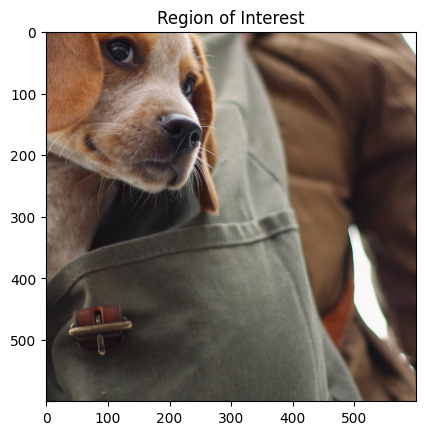

In [9]:
x_begin = doggy_backpack.shape[1] - watermark_small.shape[1]
x_end = doggy_backpack.shape[1]
y_begin = doggy_backpack.shape[0] - watermark_small.shape[0]
y_begin -= doggy_backpack.shape[0] // 4
y_end = doggy_backpack.shape[0]
y_end -= doggy_backpack.shape[0] // 4
region_of_interest = doggy_backpack[y_begin: y_end, x_begin: x_end]
plt.imshow(region_of_interest)
plt.title("Region of Interest")
plt.show()

In [10]:
region_of_interest.shape

(600, 600, 3)

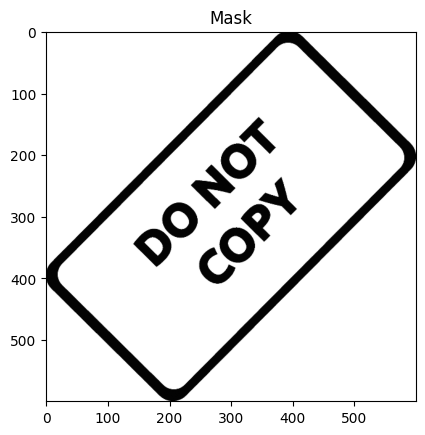

In [11]:
mask = cv2.cvtColor(watermark_small, cv2.COLOR_RGB2GRAY)
plt.title("Mask")
plt.imshow(mask, cmap='gray')
plt.show()

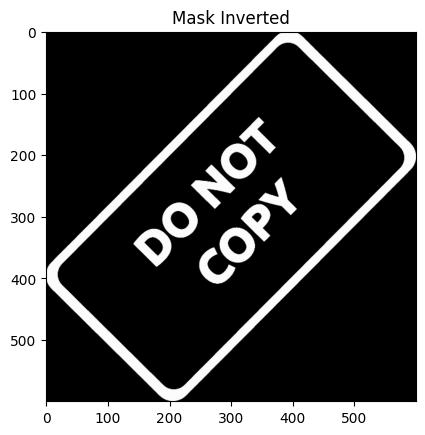

In [12]:
mask_inverted = cv2.bitwise_not(mask)
plt.title("Mask Inverted")
plt.imshow(mask_inverted, cmap='gray')
plt.show()

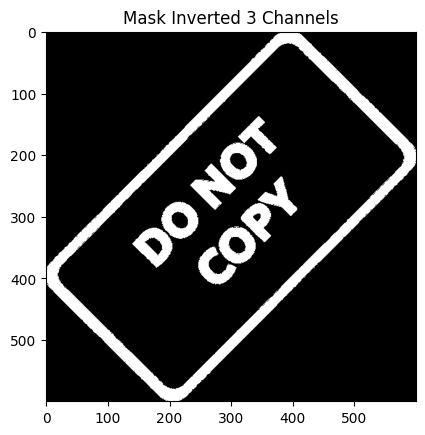

In [13]:
white_background = np.full(watermark_small.shape, 255, dtype=np.uint8)
mask_inverted_channels = cv2.bitwise_or(white_background, white_background, mask=mask_inverted)
plt.title("Mask Inverted 3 Channels")
plt.imshow(mask_inverted_channels, cmap='gray')
plt.show()

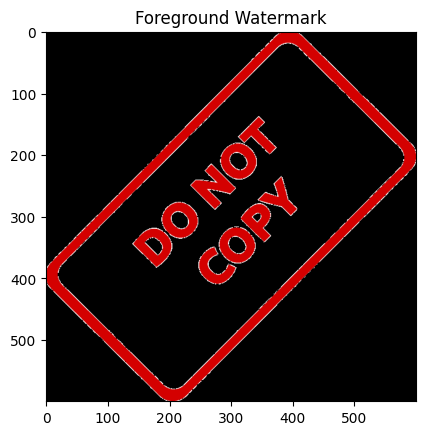

In [16]:
forground = cv2.bitwise_or(watermark_small, watermark_small, mask=mask_inverted)
plt.imshow(forground)
plt.title("Foreground Watermark")
plt.show()

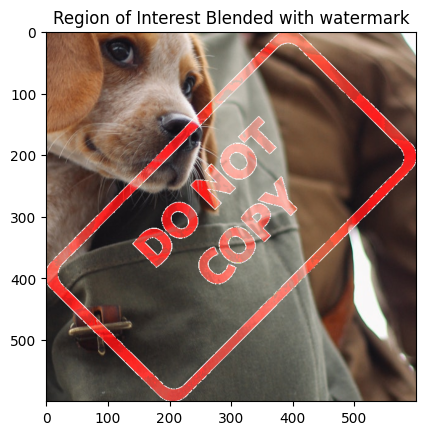

In [17]:
# 'blending' 
region_of_interest_blended = cv2.bitwise_or(region_of_interest, forground)
plt.imshow(region_of_interest_blended)
plt.title("Region of Interest Blended with watermark")
plt.show()

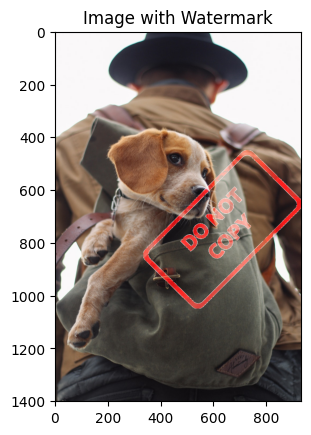

In [18]:
doggy_backpack_new = doggy_backpack.copy()
doggy_backpack_new[y_begin: y_end, x_begin: x_end] = region_of_interest_blended
plt.imshow(doggy_backpack_new)
plt.title("Image with Watermark")
plt.show()
